

- [Streamlining for-search data prep](https://github.com/thorwhalen/imbed/discussions/5)



```python
from functools import partial, cached_property
from dataclasses import dataclass
from typing import Mapping, Callable, MutableMapping

class Imbed:
    docs: Mapping = None
    segments: MutableMapping = None
    embedder: Callable = None

raw_docs = mk_text_store(doc_src_uri)  # the store used will depend on the source and format of where the docs are stored
segments = mk_segments_store(raw_docs, ...)  # will not copy any data over, but will give a key-value view of chunked (split) docs
search_ctrl = mk_search_controller(vectorDB, embedder, ...)
search_ctrl.fit(segments, doc_src_uri, ...)
search_ctrl.save(...)
```


# Imbed knowledge base

In [2]:
from hubcap import repo_text_aggregate
from pathlib import Path

string = repo_text_aggregate('thorwhalen/imbed')
Path('/Users/thorwhalen/Dropbox/_odata/ai_contexts/i2i/imbed.md').write_text(string)

Cloning into '/var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmp09c4oaun'...
Cloning into '/var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmp86ib1h_7'...
remote: Repository not found.
fatal: repository 'https://github.com/thorwhalen/imbed.wiki.git/' not found
/Users/thorwhalen/Dropbox/py/proj/t/hubcap/hubcap/util.py:280: UserWarning: It's possible that the repository doesn't have a wiki. Error: Command 'git clone https://github.com/thorwhalen/imbed.wiki.git /var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmp86ib1h_7' returned non-zero exit status 128.
  warn(f"It's possible that the repository doesn't have a wiki. Error: {e}")


83110

# Helpers

## Facades

In [ ]:
from typing import Mapping, Iterable


def get_kv_items(obj, args=(), kwargs=()):
    """Generate key-value pairs from an object.
    
    The object can be a mapping (like a dictionary) or an iterable (like a list).
    If the object is a mapping, the key-value pairs are yielded from the items
    of the mapping. If the object is an iterable, the key-value pairs are yielded
    from the elements of the iterable, with the keys being the indices of the
    elements.

    """
    kwargs = dict(kwargs)
    if isinstance(obj, Mapping):
        yield from obj.items()
    elif isinstance(obj, Iterable):
        yield from enumerate(obj, *args, **kwargs)
    else:
        raise ValueError(
            f"Object of type {type(obj)} is not supported, like your {obj=}."
        )

# A base Dacc for imbed pipelines

In [41]:
# from imbed.base import ImbedBase
from typing import Callable, T
from imbed.base import TextMapping, MetadataMapping, SegmentMapping, VectorMapping, PlanarVectorMapping
from dol import cache_this

def identity(x: T) -> T:
    return x


from functools import partial

cache_result = partial(cache_this, cache='cache')

class ImbedDaccBase:
    cache = {}

    text_to_segment: Callable[[TextMapping], SegmentMapping] = identity
    segment_to_vector: Callable[[SegmentMapping], VectorMapping] = None
    vector_to_planar_vector: Callable[[VectorMapping], PlanarVectorMapping] = None

    def download_data(self, uri):
        """Initial download of data from the source"""

    @cache_result
    def texts(self):
        """key-value view (i.e. Mapping) of the text data"""
        
    @cache_result
    def text_metadatas(self):
        """Mapping of the metadata of the text data.

        The keys of texts and text_metadatas mappings should be the same
        """

    @cache_result
    def text_segments(self):
        """Mapping of the segments of text data.

        Could be computed on the fly from the text_store and a segmentation algorithm, 
        or precomputed and stored in a separate key-value store.

        Preferably, the key of the text store should be able to be computed from key 
        of the text_segments store, and even contain the information necessary to 
        extract the segment from the corresponding text store value.

        Note that the imbed.segmentation.SegmentMapping class can be used to
        create a mapping between the text store and the text segments store.
        """
        return self.text_to_segment(self.texts)


    @cache_result
    def segment_vectors(self):
        """Mapping of the vectors (embeddings) of the segments of text data.

        The keys of the segment_vectors store should be the same as the keys of the 
        text_segments store.

        Could be computed on the fly from the text_segments and a vectorization algorithm, 
        or precomputed and stored in a separate key-value store.

        Preferably, the key of the text_segments store should be able to be computed from key 
        of the segment_vectors store, and even contain the information necessary to 
        extract the segment from the corresponding text segments store value.

        Note that the imbed.vectorization.VectorMapping class can be used to
        create a mapping between the text segments store and the segment_vectors store.
        """
        
    @cache_result
    def segment_2d_vectors(self):
        """Mapping of the 2D vectors of the segments of text data.

        The keys of the segment_2d_vectors store should be the same as the keys of the 
        segment_vectors store.

        Could be computed on the fly from the segment_vectors and a dimensionality reduction algorithm, 
        or precomputed and stored in a separate key-value store.

        Preferably, the key of the segment_vectors store should be able to be computed from key 
        of the segment_2d_vectors store, and even contain the information necessary to 
        extract the segment from the corresponding segment_vectors store value.

        Note that the imbed.dimensionality_reduction.DimensionalityReductionMapping class can be used to
        create a mapping between the segment_vectors store and the segment_2d_vectors store.
        """
        


In [38]:
from imbed.tests.utils_for_tests import *


# Components

In [1]:
import qo

/Users/thorwhalen/Dropbox/py/proj/i/dols/unbox/unbox/base.py:186: UserWarning: Not a version that is validated by this code: 3.10. Yielding nothing
  warnings.warn(
/Users/thorwhalen/Dropbox/py/proj/i/dols/unbox/unbox/base.py:191: UserWarning: It seems I can't access the python builtin names data, so I'll yield nothing. Error: FileNotFoundError(2, 'No such file or directory')
  warnings.warn(


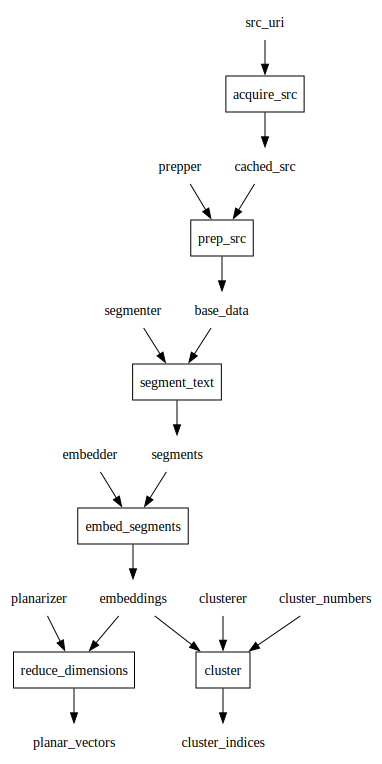

In [2]:
from meshed import code_to_dag

@code_to_dag
def imbed_dag():
    cached_src = acquire_src(src_uri)
    base_data = prep_src(cached_src, prepper)
    segments = segment_text(base_data, segmenter)
    embeddings = embed_segments(segments, embedder)
    planar_vectors = reduce_dimensions(embeddings, planarizer)
    cluster_indices = cluster(embeddings, clusterer, cluster_numbers)

imbed_dag.dot_digraph()

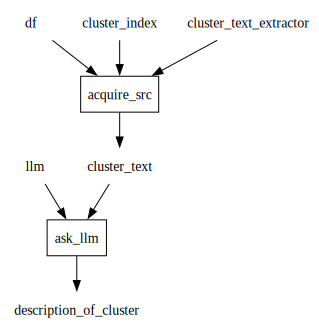

In [3]:
from meshed import code_to_dag

@code_to_dag
def cluster_description():
    cluster_text = acquire_src(df, cluster_index, cluster_text_extractor)
    description_of_cluster = ask_llm(cluster_text, llm)

cluster_description.dot_digraph()


In [35]:
import oa

describe_data = oa.prompt_function("""
Describe the data I printed below. 
Have the description be around {n_words:10} words long.
More info about the source of the data: {more_info: }.
                                   
The data:
                                   
{data}
""")

describe_data


<function oa.tools.prompt_function.<locals>.ask_oa(data, *, n_words='10', more_info=' ')>

In [4]:
from imbed_data_prep.github_repos import *

d = GithubReposData()

In [23]:
t = d.raw_data.iloc[:20]
describe_data(t['name'].to_string())

"List of various repositories with their respective owners' names."

In [33]:
from collections import Counter

Counter(d.cluster_indices.clusters_34).most_common()[-1]

(22, 36430)

In [61]:
indices = d.cluster_indices[d.cluster_indices.clusters_34 == 22].index
tt = d.raw_data.loc[indices, 'description'].values
max_description_length = 100
n_samples = 500
descriptions_text = '\n\n'.join(map(lambda x: x[:max_description_length] + '...', filter(None, tt[:n_samples])))
print(f"{len(descriptions_text)=}")

len(descriptions_text)=29924


In [53]:
describe_data(descriptions_text)

'This data describes various programming projects and libraries related to the Go language.'

In [64]:
# Confirmation
idx = indices[:n_samples]
r = sum('go' in x.lower() for x in d.raw_data.loc[idx, 'languages'].values) / len(idx)
print(f"{r * 100:.2f}% of the repos in cluster 22 mention Go in their langauges.")

85.60% of the repos in cluster 22 mention Go in their langauges.


In [ ]:
import oa

describe_data = oa.prompt_function("""
Describe the data I printed below. 
Have the description be around {n_words:100} words long.
""")



# Misc

## Make and save a markdown file aggregating the imbed repository information

In [1]:
from hubcap import repo_text_aggregate
from pathlib import Path

Path('~/Downloads/imbed.md').expanduser().write_text(repo_text_aggregate('thorwhalen/imbed'))

Cloning into '/var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmp5qxw8bb8'...
Cloning into '/var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmpp9nq7jmw'...
remote: Repository not found.
fatal: repository 'https://github.com/thorwhalen/imbed.wiki.git/' not found
/Users/thorwhalen/Dropbox/py/proj/t/hubcap/hubcap/util.py:280: UserWarning: It's possible that the repository doesn't have a wiki. Error: Command 'git clone https://github.com/thorwhalen/imbed.wiki.git /var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmpp9nq7jmw' returned non-zero exit status 128.
  warn(f"It's possible that the repository doesn't have a wiki. Error: {e}")


111207

# Scrap

In [1]:
import speech_recognition as sr

recognizer = sr.Recognizer()
audio_file_path = "/Users/thorwhalen/Downloads/cosmograph_review_02_audio.wav"

with sr.AudioFile(audio_file_path) as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data)

print(text)

uploaded two different pieces of data so my my first comment would be that it's not really obvious where I have to go to be able to render the data right it's not obvious that it's here I would say we'll talk about that later but maybe this can be in more places people come here to mainly visualise the data so maybe there can be more than one place where they can do that for example where you view the data with the data make a Google Android graph and then maybe it comes over here to go to do that so anyway I find I finally found where are we supposed to render the graph and I would like to mention a few bugs here so first of all here I select planar embeddings and I do render graph and nothing happens and do it again nothing happens now I know now that it's because the ideas required that should be more obvious if there's a problem that it's it gives a message saying hey you need to do this or maybe highlighted or anyway more obvious second of all the I'd really shouldn't be required 

In [2]:
text

"uploaded two different pieces of data so my my first comment would be that it's not really obvious where I have to go to be able to render the data right it's not obvious that it's here I would say we'll talk about that later but maybe this can be in more places people come here to mainly visualise the data so maybe there can be more than one place where they can do that for example where you view the data with the data make a Google Android graph and then maybe it comes over here to go to do that so anyway I find I finally found where are we supposed to render the graph and I would like to mention a few bugs here so first of all here I select planar embeddings and I do render graph and nothing happens and do it again nothing happens now I know now that it's because the ideas required that should be more obvious if there's a problem that it's it gives a message saying hey you need to do this or maybe highlighted or anyway more obvious second of all the I'd really shouldn't be required

In [6]:
from operator import attrgetter
from dol import Pipe, written_key
from oa import prompt_function


def video_to_audio(video_file_path):
    import moviepy.editor as mp

    video = mp.VideoFileClip(video_file_path)
    return video


def audio_file_to_text(audio_file_path):
    import speech_recognition as sr

    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data)

    return text

audio_obj_writer = lambda audio, path: audio.write_audiofile(path)
save_audio_to_wav_file = written_key(writer=audio_obj_writer, key='*.wav')
video_to_text = Pipe(
    video_to_audio, attrgetter('audio'), save_audio_to_wav_file, audio_file_to_text
)

text_to_dev_takeaways = prompt_function(
    """
From the following transcription, I'd like you to extract 
the tasks that would be relevant to developers.
These tasks should be actionable. They might be bugs to repair or features to add or enhance.
I will be copy pasting these as issues in a github repo, so please include a 
short title and a description for each task, as a bullet point list 
where the title is bolded and the description comes after the colon. Like this:
- **Title 1**: Description of the task 1
- **Title 2**: Description of the task 2           

Here's my transcription:

{text}  
"""
)

audio_to_dev_takeaways = Pipe(audio_file_to_text, text_to_dev_takeaways)
video_to_dev_takeaways = Pipe(video_to_text, text_to_dev_takeaways)

In [7]:
video_path = '/Users/thorwhalen/Dropbox/Misc/2024_misc/cosmograph_app_review_01.mov'

text = video_to_text(video_path)

MoviePy - Writing audio in /var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmp2eejt0bv.wav


MoviePy - Done.


In [8]:
print(text_to_dev_takeaways(text))

- **Pagination Flexibility**: Assess the flexibility of the table pagination feature. There may be a need for different types of navigation between pages, depending on user feedback and needs.
- **Filter Functionality**: Investigate the filter function. Currently, it appears to be disabled or not displaying any results. A user should be able to see and select filtering options.
- **Infinite Scroll Feasibility**: Consider implementing an infinite scroll feature. This feature could enhance the navigation experience, providing automatic paging for the user.
- **Selection Actions**: Check if there are existing actions associated with selection within the interface. If not currently present, ensure the design accommodates for the addition of selection-oriented actions in future.
- **Vue Migration Issue**: Review the Vue migration process as it seems not to retain focus on the current view when an action is initiated.
- **Ordering and Representation in Scatter Plots**: Reevaluate the approac

In [1]:
import pandas as pd

f = '/Users/thorwhalen/Dropbox/_odata/figiri/github-repos.parquet'
df = pd.read_parquet(f)

In [3]:
df.shape

(3274587, 26)

In [4]:
df.iloc[0]

owner                                                                  xdedzl
name                                                     RuntimeTerrainEditor
stars                                                                      82
forks                                                                      29
watchers                                                                    6
isFork                                                                  False
isArchived                                                              False
languages                                         C#: 162842, ShaderLab: 1965
languageCount                                                               2
topics                                                                       
topicCount                                                                  0
diskUsageKb                                                            140632
pullRequests                                                    